#Description of the project

##Content

This is a sales transaction data set of UK-based e-commerce (online retail) for one year. This London-based shop has been selling gifts and homewares for adults and children through the website since 2007. Their customers come from all over the world and usually make direct purchases for themselves. There are also small businesses that buy in bulk and sell to other customers through retail outlet channels. This dataset also contains negative values representing product returns.

The data set contains 500K rows and 8 columns. The following is the description of each column:

1. TransactionNo (categorical): a six-digit unique number that defines each transaction. The letter “C” in the code indicates a cancellation.
2. Date (numeric): the date when each transaction was generated.
3. ProductNo (categorical): a five or six-digit unique character used to identify a specific product.
4. Product (categorical): product/item name.
5. Price (numeric): the price of each product per unit in pound sterling (£).
6. Quantity (numeric): the quantity of each product per transaction. Negative values related to cancelled transactions.
7. CustomerNo (categorical): a five-digit unique number that defines each customer.
8. Country (categorical): name of the country where the customer resides.

Dataset can be found in: https://www.kaggle.com/datasets/gabrielramos87/an-online-shop-business.

#Importing the needed libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np


#EDA

In [3]:
df_raw = pd.read_csv('/content/drive/MyDrive/ai4cm_datasets/Sales Transaction v.4a.csv')

In [4]:
df_raw

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom
...,...,...,...,...,...,...,...,...
536345,C536548,12/1/2018,22168,Organiser Wood Antique White,18.96,-2,12472.0,Germany
536346,C536548,12/1/2018,21218,Red Spotty Biscuit Tin,14.09,-3,12472.0,Germany
536347,C536548,12/1/2018,20957,Porcelain Hanging Bell Small,11.74,-1,12472.0,Germany
536348,C536548,12/1/2018,22580,Advent Calendar Gingham Sack,16.35,-4,12472.0,Germany


##General statistics

In [5]:
# general information about the dataset
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  536350 non-null  object 
 1   Date           536350 non-null  object 
 2   ProductNo      536350 non-null  object 
 3   ProductName    536350 non-null  object 
 4   Price          536350 non-null  float64
 5   Quantity       536350 non-null  int64  
 6   CustomerNo     536295 non-null  float64
 7   Country        536350 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.7+ MB


In [6]:
df_raw.describe(percentiles=[.01,.1,.25,.5,.75,.90,.95,.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,95%,99%,max
Price,536350.0,12.662182,8.490450,5.13,5.97,6.19,10.99,11.94,14.09,17.37,19.42,27.3,660.62
Quantity,536350.0,9.919347,216.662300,-80995.00,-1.00,1.00,1.00,3.00,10.00,24.00,29.00,100.0,80995.00
CustomerNo,536295.0,15227.893178,1716.582932,12004.00,12237.00,12809.00,13807.00,15152.00,16729.00,17646.00,17857.00,18180.0,18287.00


In [7]:
# checking the missing values
df_raw.isnull().sum()

TransactionNo     0
Date              0
ProductNo         0
ProductName       0
Price             0
Quantity          0
CustomerNo       55
Country           0
dtype: int64

The missing values are very few so they will be dropped later on.

In [8]:
df_raw['Date'] = pd.to_datetime(df_raw['Date'])

In [9]:
print("Min Date is: ", df_raw.Date.min())
print("Max Date is: ", df_raw.Date.max())

Min Date is:  2018-12-01 00:00:00
Max Date is:  2019-12-09 00:00:00


Checking in which countries are the purcheses done  

In [10]:
# Check unique values of each column in the dataset using a for loop
for column in df_raw.columns:
        if column in ['Country']:
                print("Column: {} - Unique Values: {}".format(column, df_raw[column].unique()))
                print("="*80)

Column: Country - Unique Values: ['United Kingdom' 'Norway' 'Belgium' 'Germany' 'France' 'Austria'
 'Netherlands' 'EIRE' 'USA' 'Channel Islands' 'Iceland' 'Portugal' 'Spain'
 'Finland' 'Italy' 'Greece' 'Japan' 'Sweden' 'Denmark' 'Cyprus' 'Malta'
 'Switzerland' 'Australia' 'Czech Republic' 'Poland' 'Hong Kong'
 'Singapore' 'RSA' 'Israel' 'Unspecified' 'United Arab Emirates' 'Canada'
 'European Community' 'Bahrain' 'Brazil' 'Saudi Arabia' 'Lebanon'
 'Lithuania']


Unique products

In [ ]:
df_raw.ProductName.nunique()

3768

Most and least sold products

In [ ]:
frequency = df_raw['ProductName'].value_counts()

most_frequent = frequency.idxmax()
most_frequent_count = frequency.max()

least_frequent = frequency.idxmin()
least_frequent_count = frequency.min()

print(f'The most frequently sold product is: {most_frequent}, sold {most_frequent_count} times.')
print(f'The least frequently sold product is: {least_frequent}, sold {least_frequent_count} times.')

The most frequently sold product is: Cream Hanging Heart T-Light Holder, sold 2378 times.
The least frequently sold product is: Flower Shop Design Mug, sold 1 times.


Unique customers

In [ ]:
df_raw.CustomerNo.nunique()

4738

Average purchases per customer

In [ ]:
# Average Number of Invoice per Customer
df_raw.groupby('CustomerNo').agg(TransactionNo=('TransactionNo', 'nunique')).TransactionNo.mean()

4.889826931194597

Top 5 countries with most purchases

##Graphs

###Where are our customers from?

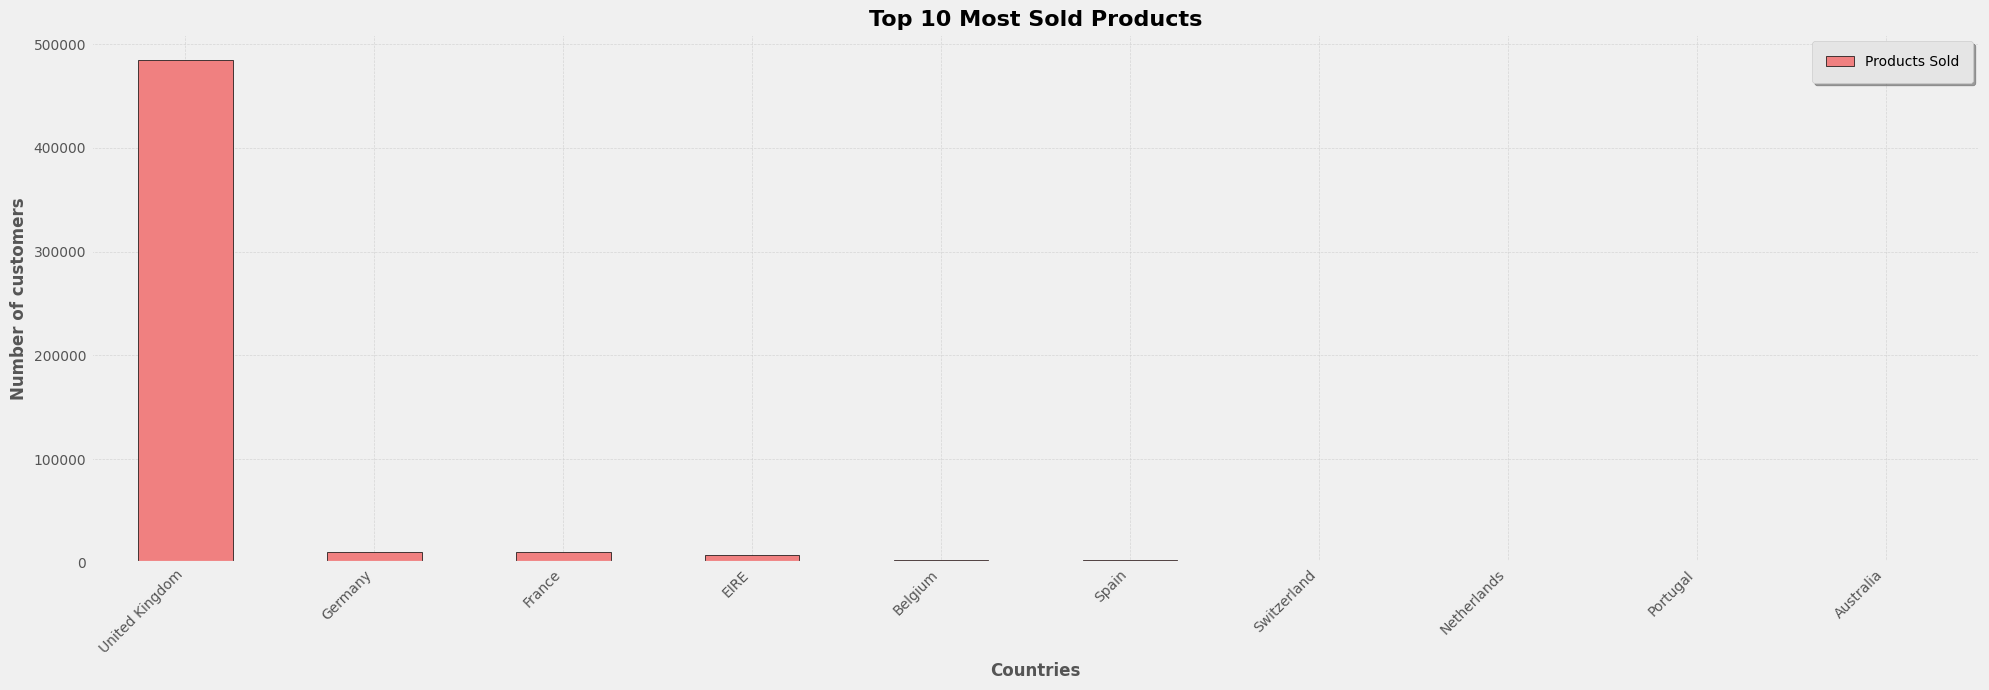

In [ ]:
import matplotlib.pyplot as plt

country_counts = df_raw['Country'].value_counts()
top_countries = country_counts.head(10)

plt.figure(figsize=(20, 7))
ax = top_countries.plot(kind='bar', color='lightcoral', edgecolor='black')

plt.style.use('ggplot')

plt.title('Top 10 Most Sold Products', fontsize=16, fontweight='bold')
plt.xlabel('Countries', fontsize=12, fontweight='bold')
plt.ylabel('Number of customers', fontsize=12, fontweight='bold')

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

ax.legend(['Products Sold'], fontsize=10, frameon=True, shadow=True, borderpad=1)

plt.tight_layout()
plt.show()


Since almost all our customers are from U.K we might be interested only of them for simplicity and thus disregarding the other countries.

###Seasionality of the customers

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Manually created list of UK public holidays for 2019
holidays = {
    'Holiday': [
        'New Year\'s Day', 'St. Patrick\'s Day (Observed)', 'Good Friday',
        'Easter Monday', 'Early May Bank Holiday', 'Spring Bank Holiday',
        'Battle of the Boyne', 'Summer Bank Holiday (Scotland)',
        'Summer Bank Holiday', 'St. Andrew\'s Day (Observed)',
        'Christmas Day', 'Boxing Day'
    ],
    'Date': [
        '2019-01-01', '2019-03-18', '2019-04-19',
        '2019-04-22', '2019-05-06', '2019-05-27',
        '2019-07-12', '2019-08-05', '2019-08-26',
        '2019-12-02', '2019-12-25', '2019-12-26'
    ]
}
holidays = pd.DataFrame(holidays)



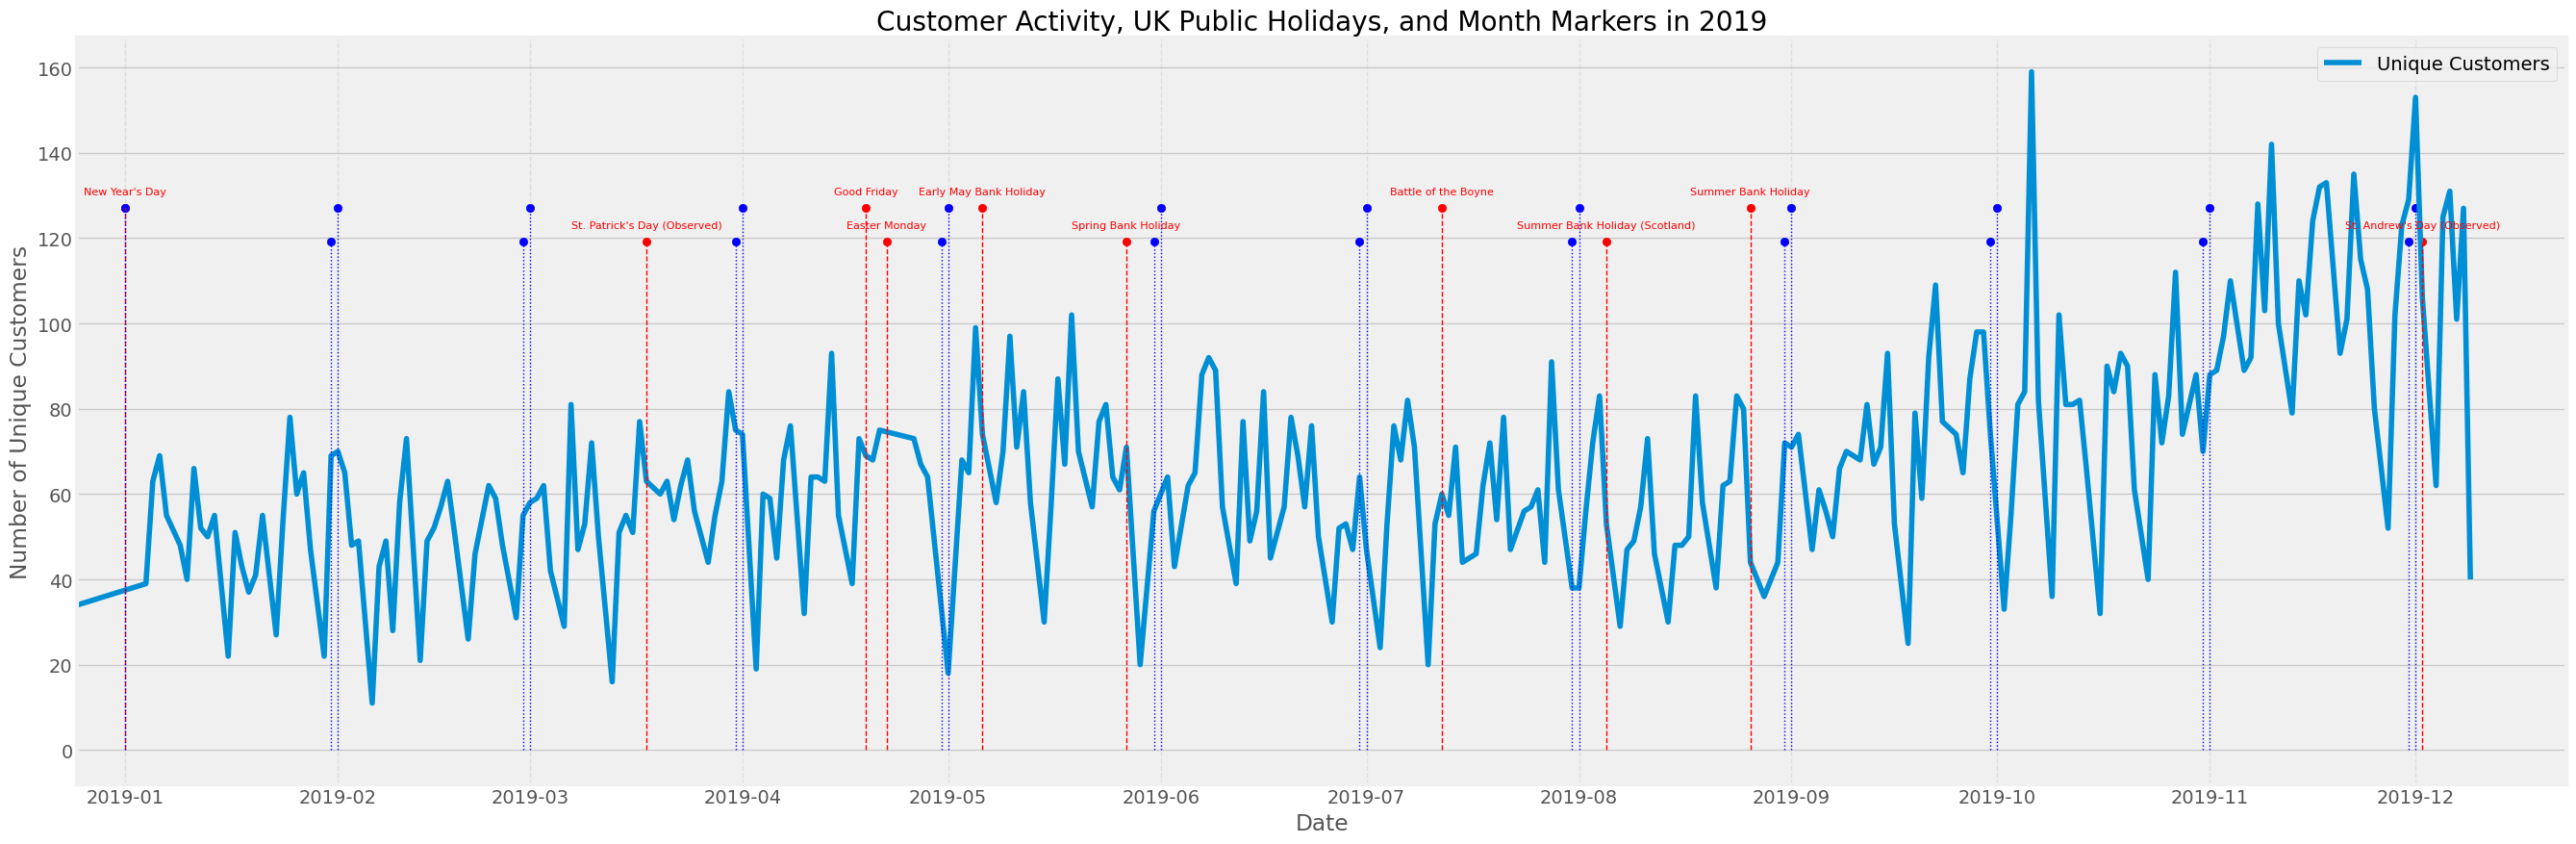

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df_raw['Date'] = pd.to_datetime(df_raw['Date'])
holidays['Date'] = pd.to_datetime(holidays['Date'])

df_customers = df_raw.copy()
df_customers = df_customers.groupby('Date').agg(InvoiceNo=('CustomerNo', 'nunique'))

plt.figure(figsize=(27, 9))
plt.style.use('fivethirtyeight')
ax1 = plt.gca()

sns.lineplot(data=df_customers, x='Date', y='InvoiceNo', ax=ax1, label='Unique Customers')

plt.xlim(pd.Timestamp('2018-12-25'), pd.Timestamp('2019-12-23'))

# setting up the start and end of the month
month_starts_ends = pd.date_range('2019-01-01', '2019-12-31', freq='MS').tolist() + pd.date_range('2019-01-01', '2019-12-31', freq='M').tolist()
month_starts_ends.sort()

max_count = df_customers['InvoiceNo'].max()

# plotting the holidays
stagger_heights = [max_count * 0.8 if i % 2 == 0 else max_count * 0.75 for i in range(len(holidays) + len(month_starts_ends))]
for i, (txt, height) in enumerate(zip(holidays['Holiday'], stagger_heights[:len(holidays)])):
    ax1.annotate(txt, (holidays['Date'][i], height), textcoords="offset points", xytext=(0,10), ha='center', color='red', fontsize=8)
    ax1.scatter(holidays['Date'][i], height, color='red')
    ax1.plot([holidays['Date'][i], holidays['Date'][i]], [0, height], linestyle='--', color='red', linewidth=1)

# plotting the strat and end of the month
for i, date in enumerate(month_starts_ends):
    height = stagger_heights[len(holidays) + i]
    ax1.scatter(date, height, color='blue')
    ax1.plot([date, date], [0, height], linestyle=':', color='blue', linewidth=1)

# Titles and labels
plt.title('Customer Activity, UK Public Holidays, and Month Markers in 2019')
plt.xlabel('Date')
plt.ylabel('Number of Unique Customers')
ax1.legend()


plt.tight_layout()
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.show()


Here i plotted the seasionality of the purchases made by the customers and also the holidays, which are denoted by the red dots, and as expected whenever there is a holiday we have a spike in the data.

Also, according to my research, people in the uk get mostly get paid in either the first day of the month or the last and assuming this is true, i plotted these days, represented by the blue dots, and mostly whenever we have a first or last day of a month, basically when the people are paid, we see a spike in purchases.

Other spikes are seen a few days after the spikes of the "pay day" so we can also assume that people also tend to make a lot of purchases after they get paid and this information can be useful.

###10 most sold products

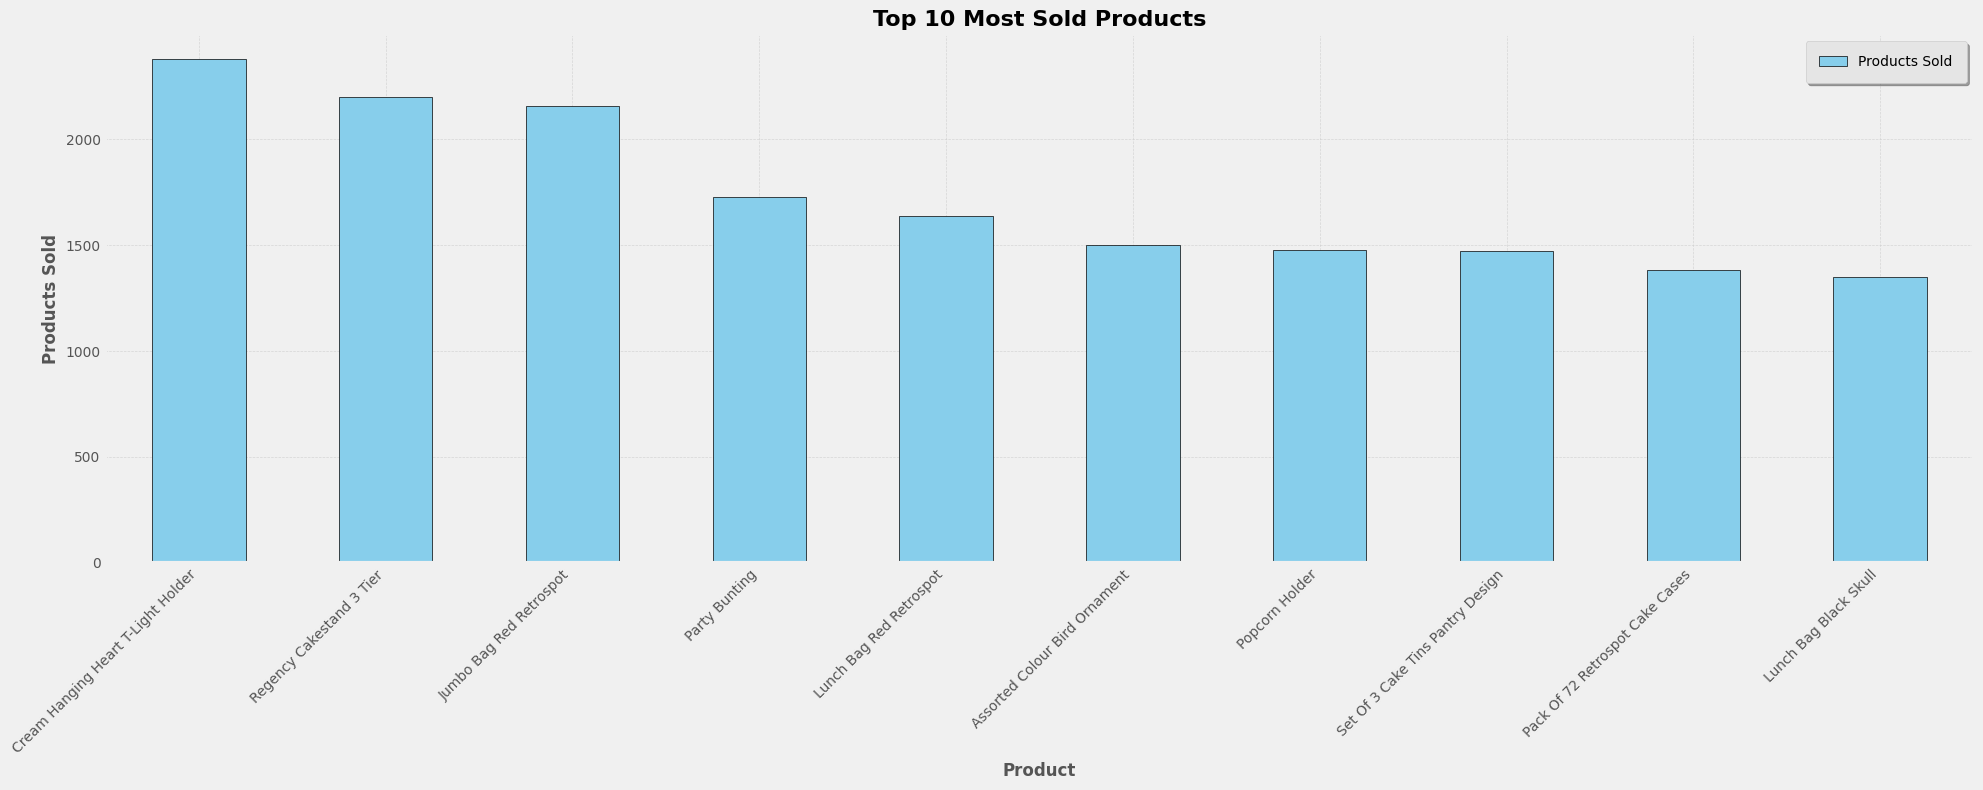

In [ ]:
import matplotlib.pyplot as plt

products_counts = df_raw['ProductName'].value_counts()
top_products = products_counts.head(10)

plt.figure(figsize=(20, 8))
ax = top_products.plot(kind='bar', color='skyblue', edgecolor='black')

plt.style.use('ggplot')

plt.title('Top 10 Most Sold Products', fontsize=16, fontweight='bold')
plt.xlabel('Product', fontsize=12, fontweight='bold')
plt.ylabel('Products Sold', fontsize=12, fontweight='bold')

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

ax.legend(['Products Sold'], fontsize=10, frameon=True, shadow=True, borderpad=1)

plt.tight_layout()
plt.show()


###10 products that generate the most revenue

In [11]:
df_raw['TotalRevenue'] = df_raw['Quantity'] * df_raw['Price']

total_revenue_by_product = df_raw.groupby('ProductName')['TotalRevenue'].sum()

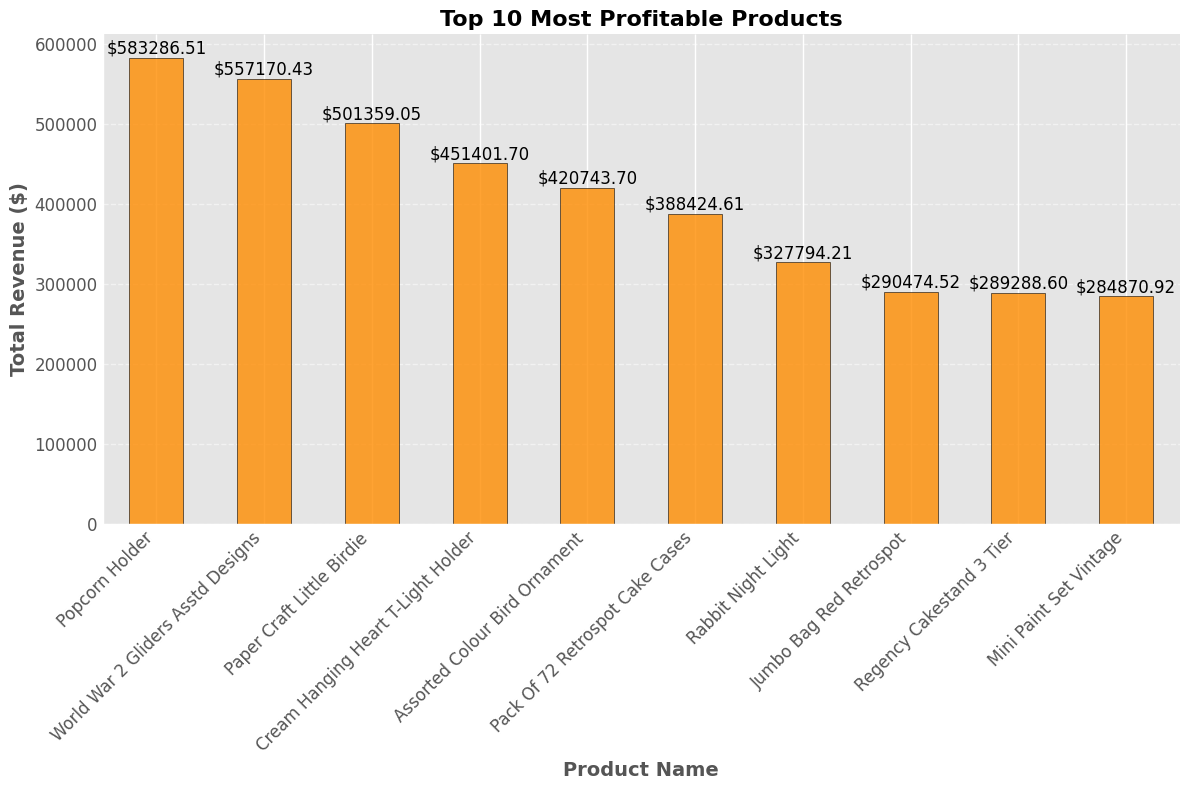

In [ ]:
# Plotting the results

top_products_by_revenue = total_revenue_by_product.sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 8))
ax = top_products_by_revenue.plot(kind='bar', color='darkorange', edgecolor='black', alpha=0.8)

# Add labels and title
plt.title('Top 10 Most Profitable Products', fontsize=16, fontweight='bold')
plt.xlabel('Product Name', fontsize=14, fontweight='bold')
plt.ylabel('Total Revenue ($)', fontsize=14, fontweight='bold')

# Customize ticks and grid
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adding data labels on top of each bar
for i, v in enumerate(top_products_by_revenue):
    ax.text(i, v + 10, f"${v:.2f}", ha='center', va='bottom', fontsize=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

###15 most returned products

To do this we will separate the dataset with the sold items from its returned items.

In [ ]:
# Filtering transactions where the number starts with 'C' (returns) as this is how they are denoted
returned_transactions = df_raw[df_raw['TransactionNo'].astype(str).str.startswith('C')]

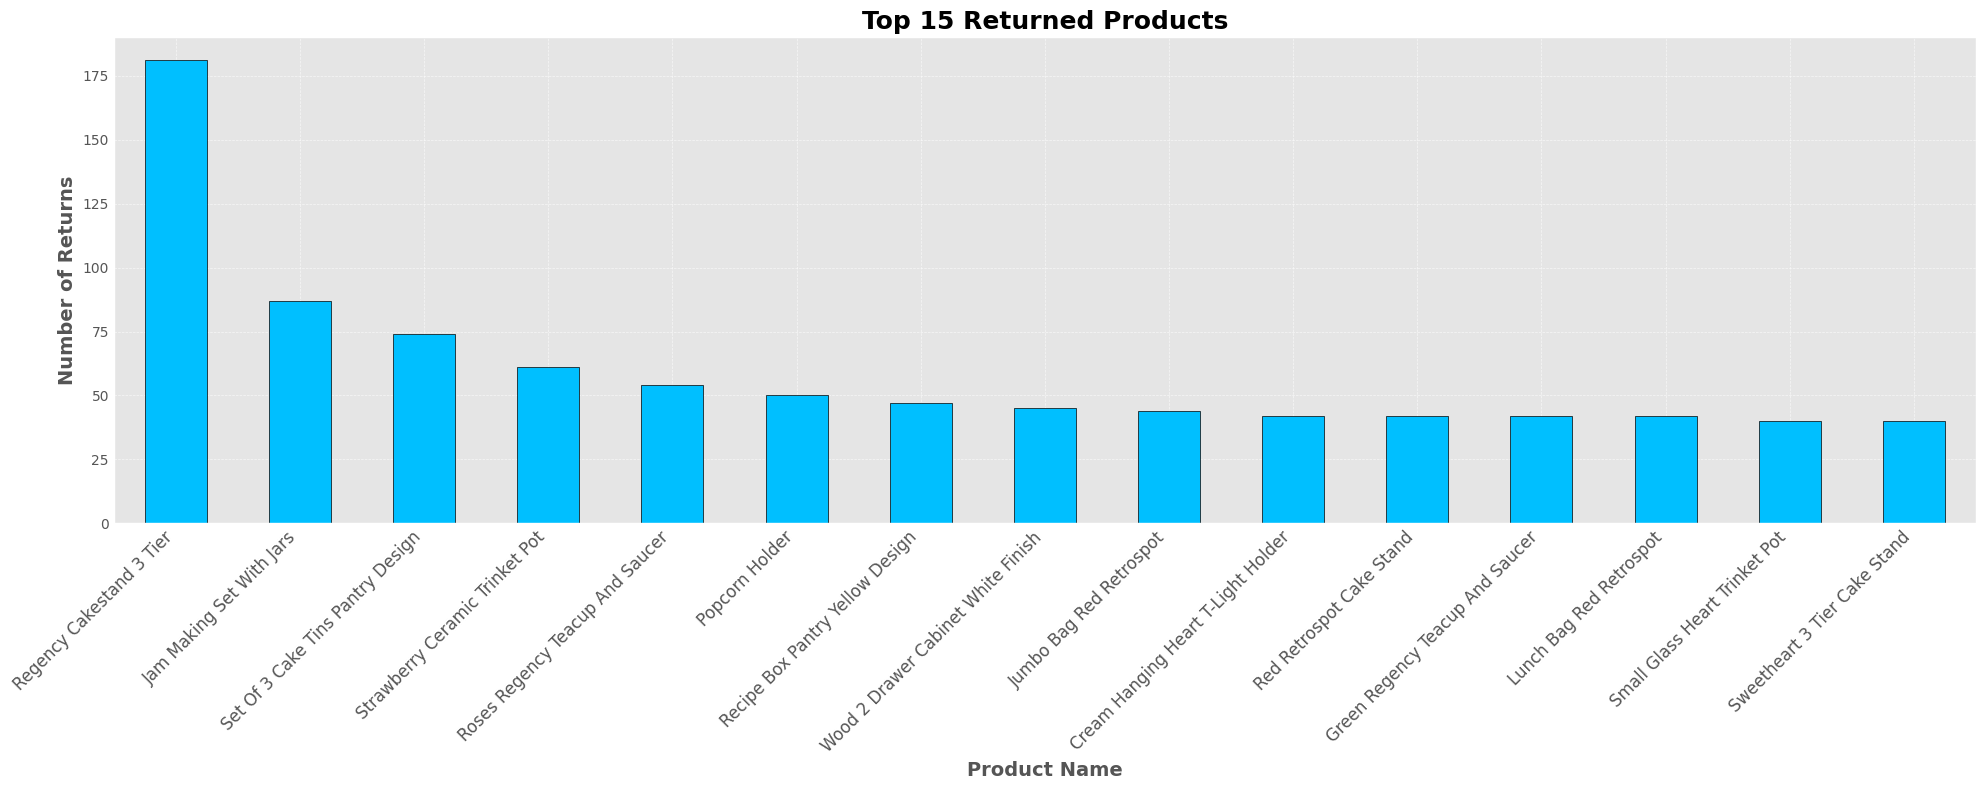

In [ ]:
product_counts = returned_transactions['ProductName'].value_counts().head(15)

plt.figure(figsize=(20, 8))
ax = product_counts.plot(kind='bar', color='deepskyblue', edgecolor='black')

plt.style.use('ggplot')
ax.set_title('Top 15 Returned Products', fontsize=18, fontweight='bold')
ax.set_xlabel('Product Name', fontsize=14, fontweight='bold')
ax.set_ylabel('Number of Returns', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)

plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


#Data preprocessing

We will first start by dropping the missing values which were only 55.

In [19]:
df_raw.dropna(inplace=True)

In [20]:
df_raw.isnull().sum()

TransactionNo    0
Date             0
ProductNo        0
ProductName      0
Price            0
Quantity         0
CustomerNo       0
Country          0
TotalRevenue     0
dtype: int64

Keeping only UK

In [21]:
df_clean = df_raw.copy()

In [22]:
df_clean = df_clean[df_clean['Country'] == 'United Kingdom']

Since all the customers are noe from U.K we can also drop the column country as it doesnt serve any purpose now, even for the cluster analysis.

In [23]:
df_clean.drop(columns=['Country'], inplace=True)

In [24]:
df_clean

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,TotalRevenue
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,257.64
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,383.40
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,138.36
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,127.80
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,71.64
...,...,...,...,...,...,...,...,...
536331,C536391,2018-12-01,22557,Plasters In Tin Vintage Paisley,11.94,-12,17548.0,-143.28
536332,C536391,2018-12-01,22553,Plasters In Tin Skulls,11.94,-24,17548.0,-286.56
536333,C536506,2018-12-01,22960,Jam Making Set With Jars,14.61,-6,17897.0,-87.66
536334,C536543,2018-12-01,22632,Hand Warmer Red Retrospot,12.40,-1,17841.0,-12.40


The ProductNo and TransactionNo are mostly integers in a string so we will let them like that as it is no problem. These are just identifiers and wont be subject to much work.

In [25]:
df_clean.drop_duplicates()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,TotalRevenue
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,257.64
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,383.40
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,138.36
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,127.80
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,71.64
...,...,...,...,...,...,...,...,...
536331,C536391,2018-12-01,22557,Plasters In Tin Vintage Paisley,11.94,-12,17548.0,-143.28
536332,C536391,2018-12-01,22553,Plasters In Tin Skulls,11.94,-24,17548.0,-286.56
536333,C536506,2018-12-01,22960,Jam Making Set With Jars,14.61,-6,17897.0,-87.66
536334,C536543,2018-12-01,22632,Hand Warmer Red Retrospot,12.40,-1,17841.0,-12.40


In [26]:
# formating CustomerNo
df_clean['CustomerNo'] = df_clean['CustomerNo'].astype(int)

In [27]:
# grouping the dataset
transaction_df = df_clean.groupby('CustomerNo').agg(TotalTransactions=('TransactionNo', 'nunique')).reset_index()
revenue_df = df_clean.groupby('CustomerNo').agg(TotalRevenue=('TotalRevenue', 'sum')).reset_index()
quantity_df = df_clean.groupby('CustomerNo').agg(TotalQuantity=('Quantity', 'sum')).reset_index()

In [28]:
# merging the dataset
grouped_df_1 = pd.merge(transaction_df, quantity_df, on='CustomerNo', how='left')
grouped_df = pd.merge(grouped_df_1, revenue_df, on='CustomerNo', how='left')

In [29]:
grouped_df

,CustomerNo,TotalTransactions,TotalQuantity,TotalRevenue
0,12004,1,104,1509.60
1,12006,1,2,24.76
2,12008,1,421,5689.57
3,12013,1,3,69.96
4,12024,1,14,149.52
...,...,...,...,...
4319,18280,1,45,623.26
4320,18281,1,54,576.58
4321,18282,3,98,992.11
4322,18283,16,1395,12114.61


#RFM analysis

##Creating the dataframes

In [30]:
# customers
df_customers = grouped_df['CustomerNo']

# Recency
df_recency = df_clean.groupby('CustomerNo').agg(MaxInvoiceDate=('Date','max')).reset_index()
df_recency['Recency'] = (pd.to_datetime('2019-12-23') - df_recency['MaxInvoiceDate']).dt.days

# Monetary
df_monetary = df_clean.groupby('CustomerNo').agg(Monetary=('TotalRevenue', 'sum')).reset_index()

# Frequency
df_frequency = df_clean.groupby('CustomerNo').agg(Frequency=('TransactionNo', 'nunique')).reset_index()

Merging the datasets we created above

In [31]:
df_rfm = pd.merge(df_customers, df_recency, on='CustomerNo', how='left')
df_rfm = pd.merge(df_rfm, df_monetary, on='CustomerNo', how='left')
df_rfm = pd.merge(df_rfm, df_frequency, on='CustomerNo', how='left')
df_rfm.drop(columns=['MaxInvoiceDate'], inplace=True)

In [32]:
df_rfm

,CustomerNo,Recency,Monetary,Frequency
0,12004,241,1509.60,1
1,12006,232,24.76,1
2,12008,290,5689.57,1
3,12013,373,69.96,1
4,12024,190,149.52,1
...,...,...,...,...
4319,18280,291,623.26,1
4320,18281,194,576.58,1
4321,18282,21,992.11,3
4322,18283,17,12114.61,16


In [33]:
df_rfm[['Recency','Frequency','Monetary']].describe(percentiles=[.01,.1,.25,.5,.75,.90,.95,.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,95%,99%,max
Recency,4324.0,109.798104,102.339988,14.00,15.0000,18.000,31.0000,66.00,170.00,280.000,331.8500,381.7700,387.00
Frequency,4324.0,4.837650,8.199175,1.00,1.0000,1.000,1.0000,3.00,5.00,10.000,15.0000,34.0000,218.00
Monetary,4324.0,11566.110326,35576.090601,-3722.46,15.2086,748.909,1732.0175,4527.03,11326.83,22571.052,35876.7895,99622.6687,897137.36


In [34]:
df_rfm_clean = df_rfm.copy()

# Filter out customers with more than 10 purchase in the last year
df_rfm_clean = df_rfm_clean.loc[df_rfm_clean['Frequency'] <= 10]
# Filter out customers with more than 10 000€ purchases in the last year (c.a. 99%)
df_rfm_clean = df_rfm_clean.loc[df_rfm_clean['Monetary'] <= 10000]

##Graphs

###Correlation matrix between our metrics

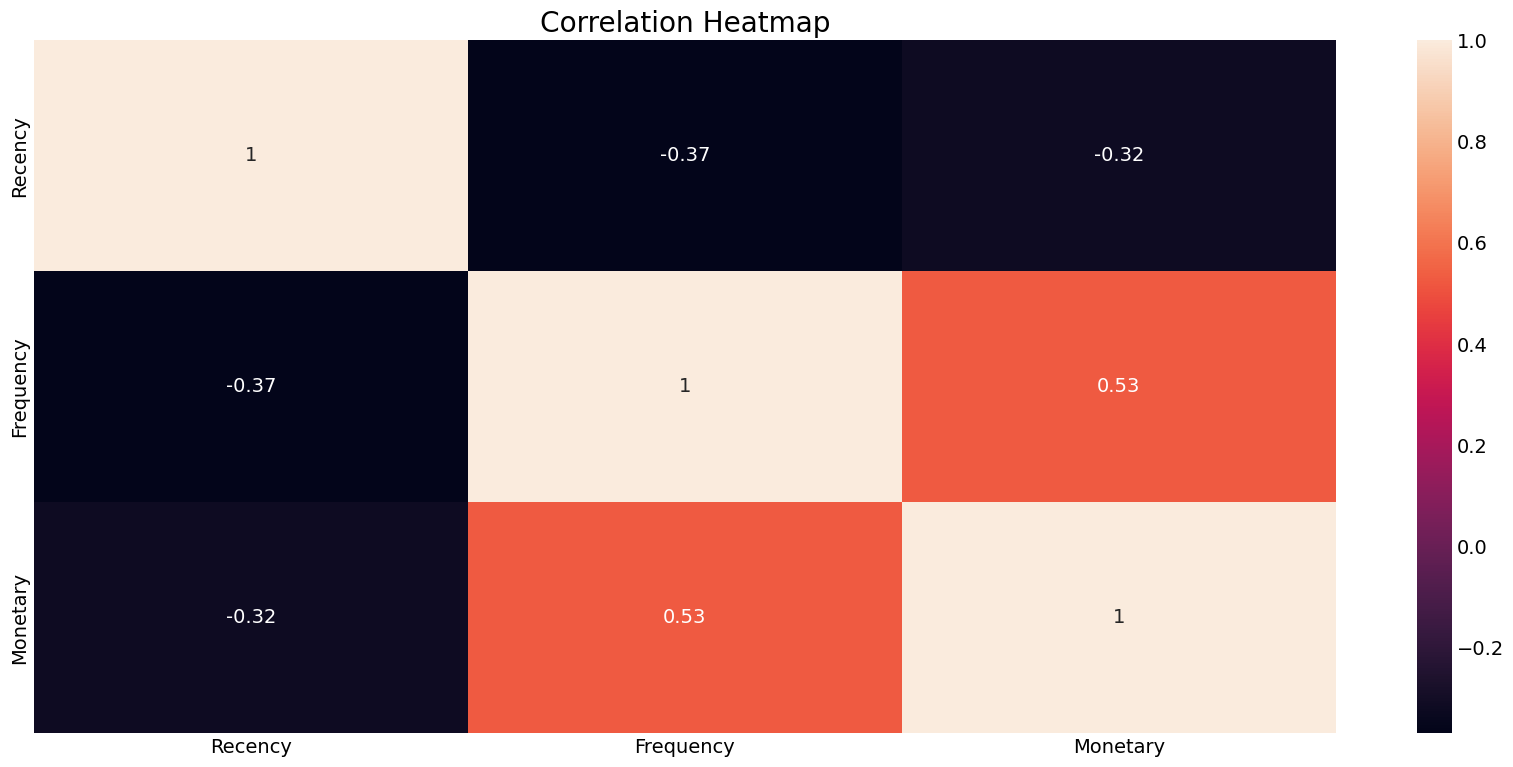

In [35]:
corr_matrix = df_rfm_clean[['Recency','Frequency','Monetary']].corr()
corr_matrix
# Plot the correlation heatmap
plt.figure(figsize=(21, 9))
plt.style.use('fivethirtyeight')
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()

###Frequency and Monetary Value correlation

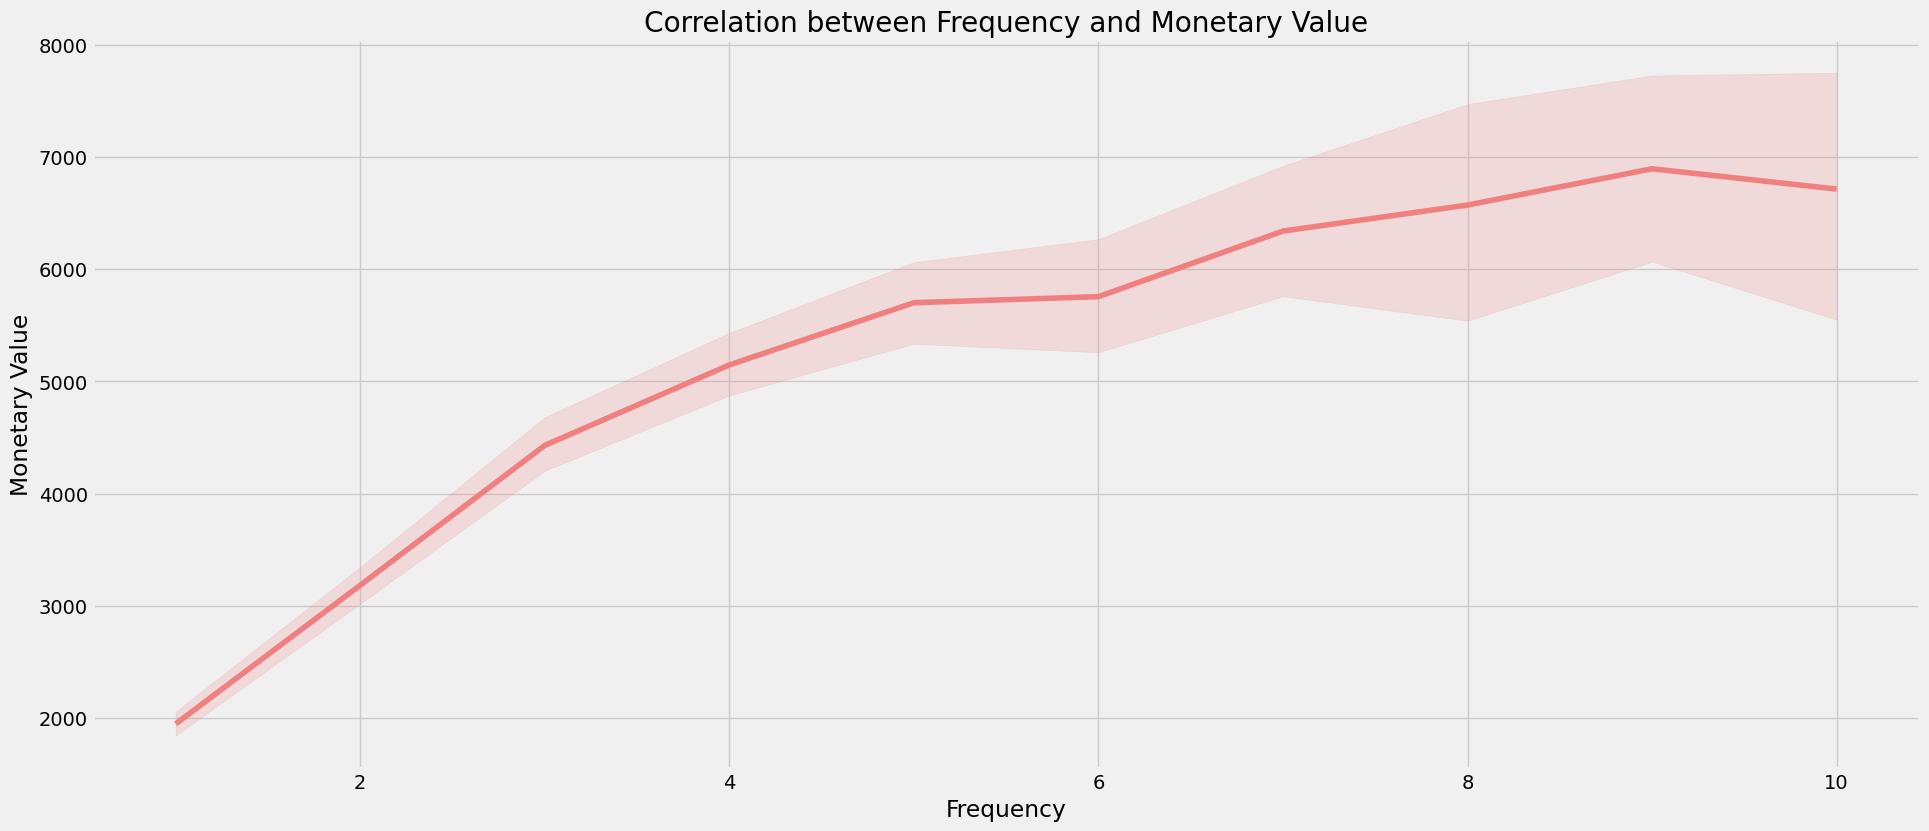

In [36]:
plt.figure(figsize=(21, 9))
plt.style.use('fivethirtyeight')
sns.lineplot(x='Frequency', y='Monetary', data=df_rfm_clean, estimator='mean', color='lightcoral')
plt.xlabel('Frequency')
plt.ylabel('Monetary Value')
plt.title('Correlation between Frequency and Monetary Value')
plt.show()

###Correlation between Frequency and Recency

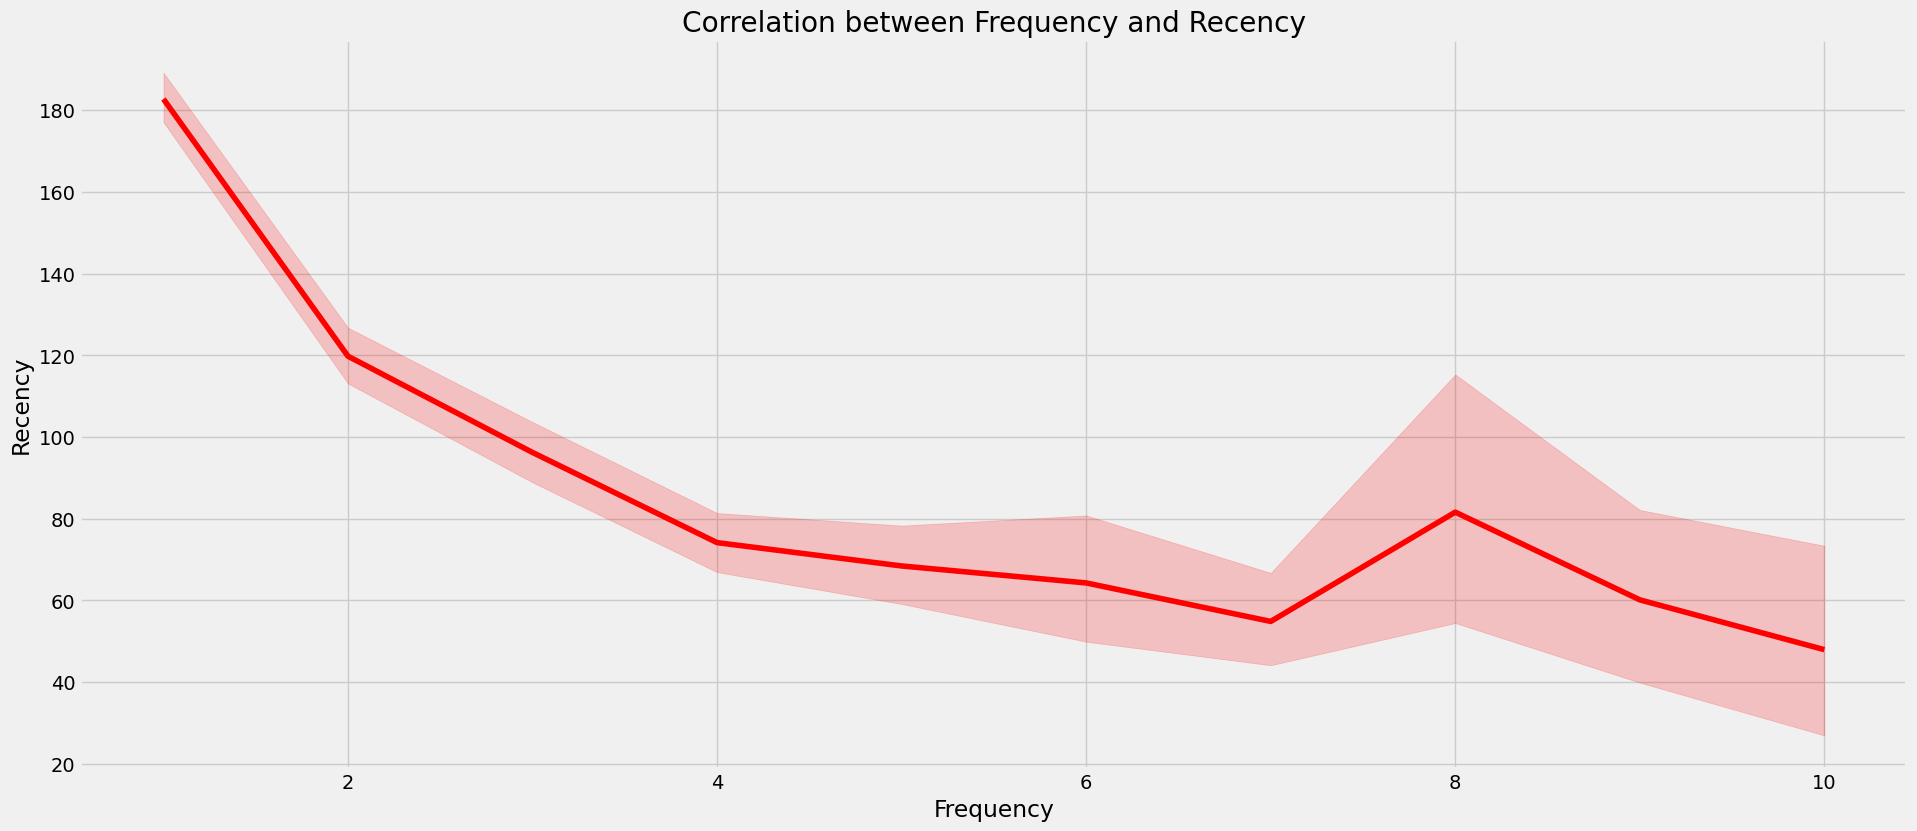

In [37]:
plt.figure(figsize=(21, 9))
plt.style.use('fivethirtyeight')
sns.lineplot(x='Frequency', y='Recency', data=df_rfm_clean, estimator='mean', color='red')
plt.xlabel('Frequency')
plt.ylabel('Recency')
plt.title('Correlation between Frequency and Recency')
plt.show()

###Distribution of the scores

In [38]:
# ranking the scores
df_rfm_clean['R_rank'] = df_rfm_clean['Recency'].rank(ascending=False)
df_rfm_clean['F_rank'] = df_rfm_clean['Frequency'].rank(ascending=True)
df_rfm_clean['M_rank'] = df_rfm_clean['Monetary'].rank(ascending=True)

# normalizing the rank of the customers
df_rfm_clean['R_rank_norm'] = (df_rfm_clean['R_rank']/df_rfm_clean['R_rank'].max())*100
df_rfm_clean['F_rank_norm'] = (df_rfm_clean['F_rank']/df_rfm_clean['F_rank'].max())*100
df_rfm_clean['M_rank_norm'] = (df_rfm_clean['F_rank']/df_rfm_clean['M_rank'].max())*100

df_rfm_clean.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)

In [39]:
RECENCY_WEIGHT = .4
FREQUENCY_WEIGHT = .3
MONETARY_WEIGHT = .3



df_rfm_clean['RFMScore'] = (
    RECENCY_WEIGHT * df_rfm_clean['R_rank_norm'] +
    FREQUENCY_WEIGHT * df_rfm_clean['F_rank_norm'] +
    MONETARY_WEIGHT * df_rfm_clean['M_rank_norm'])

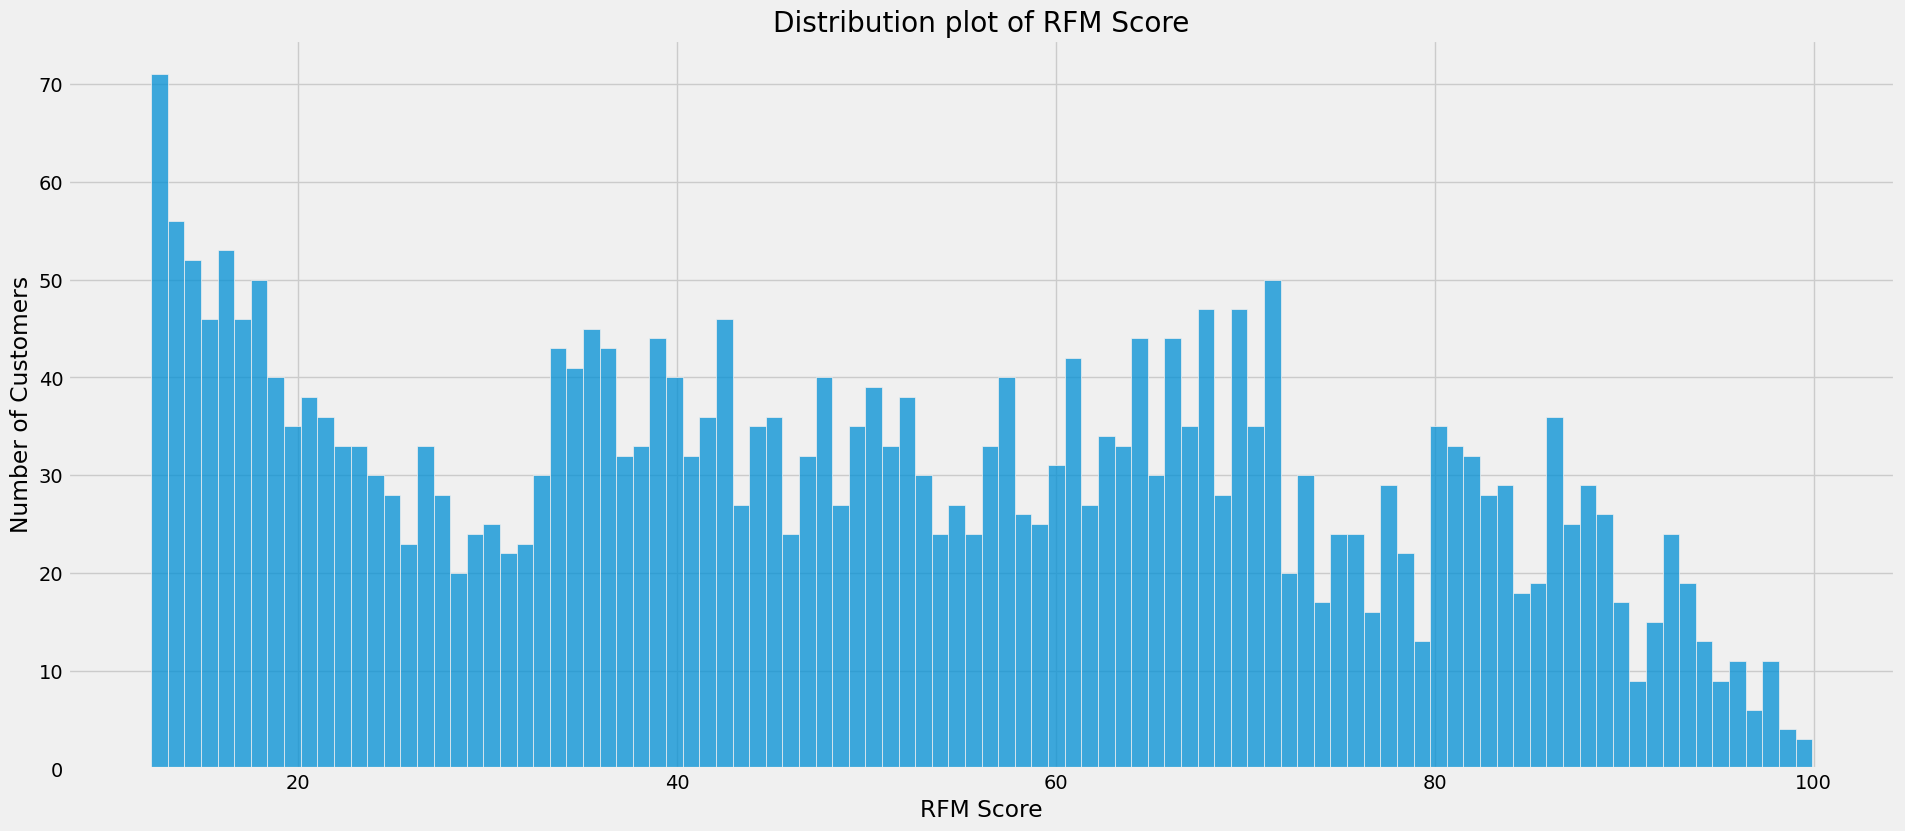

In [40]:
plt.figure(figsize=(21, 9))
plt.style.use('fivethirtyeight')
sns.histplot(df_rfm_clean, x='RFMScore', bins=100)
plt.xlabel('RFM Score')
plt.ylabel('Number of Customers')
plt.title('Distribution plot of RFM Score')
plt.show()

###Correlation betweeen frequency and recency to evaluate the customers

In [41]:
df_rfm_clean["RFMSegment"] = np.where(
    df_rfm_clean['RFMScore'] > 85, "4. Elite Customer",
        np.where(df_rfm_clean['RFMScore'] > 70, "3. High value Customer",
            np.where(df_rfm_clean['RFMScore'] > 30, "2. Medium value Customer", "1. Low value Customer")))

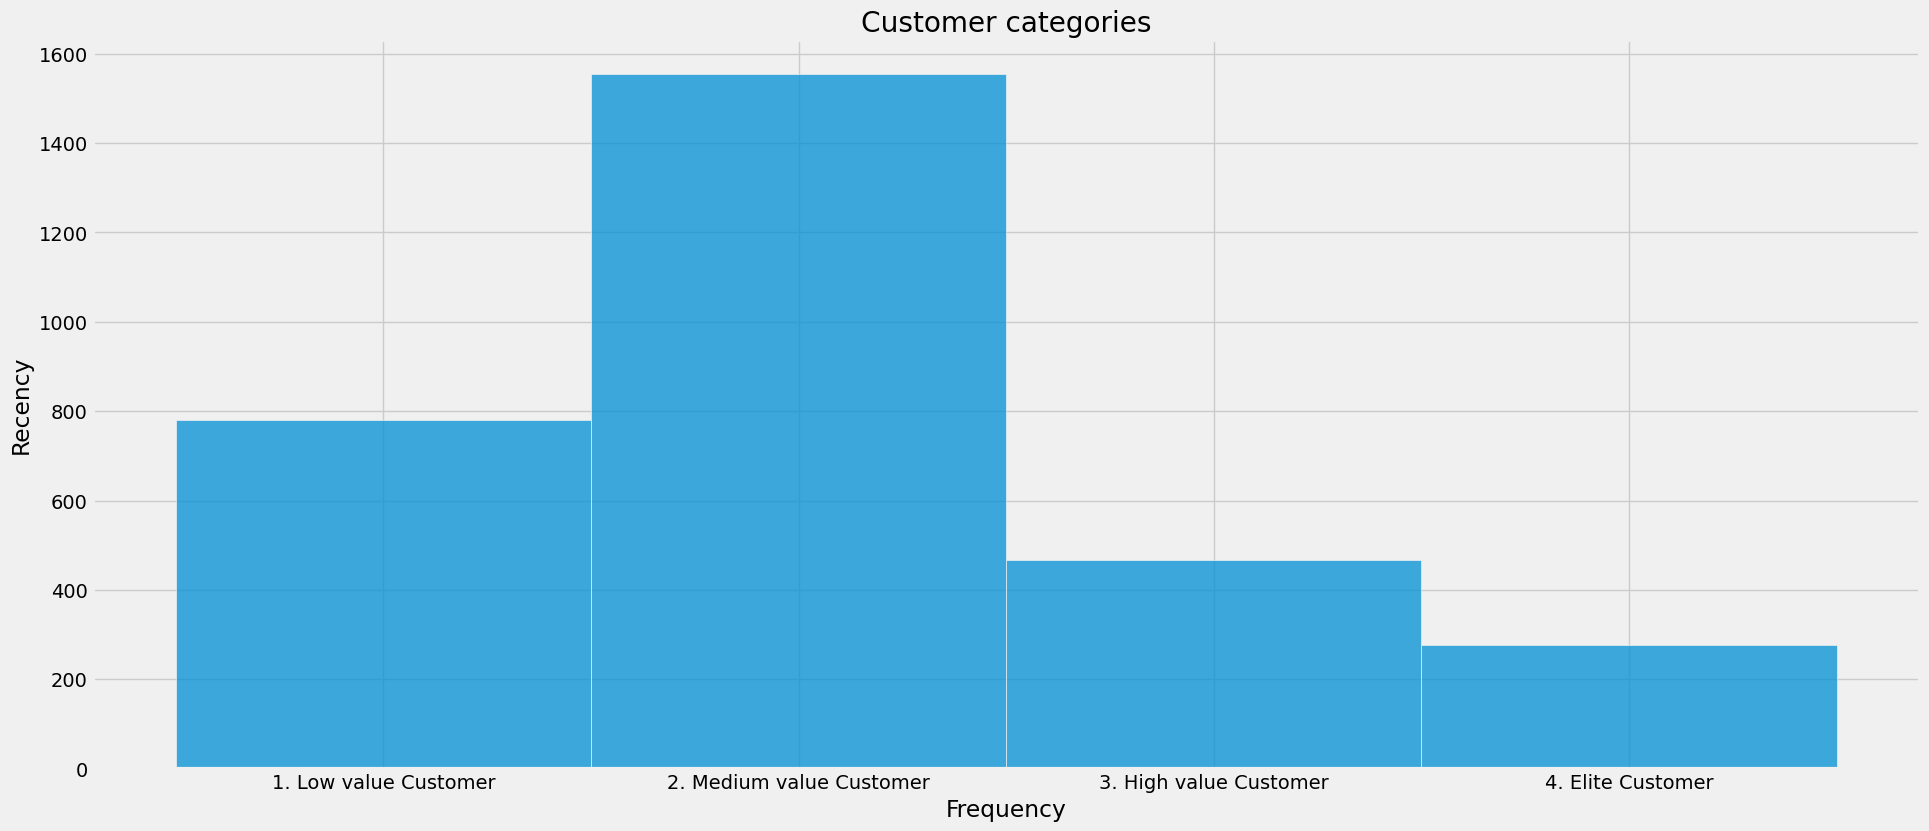

In [42]:
plt.figure(figsize=(21, 9))
plt.style.use('fivethirtyeight')
sns.histplot(x='RFMSegment', data=df_rfm_clean)
plt.xlabel('Frequency')
plt.ylabel('Recency')
plt.title('Customer categories')
plt.show()

###Describing the customers

In [43]:
(
    df_rfm_clean
    .groupby("RFMSegment")
    .agg(
        avg_recency=("Recency", "mean")
        , avg_frequency=("Frequency", "mean")
        , avg_monetary=("Monetary", "mean")
    )
)

,avg_recency,avg_frequency,avg_monetary
RFMSegment,,,
1. Low value Customer,257.131882,1.000000,1815.496492
2. Medium value Customer,111.220077,2.040541,3169.266030
3. High value Customer,49.935760,4.032120,5056.155889
4. Elite Customer,26.137681,5.913043,6025.493659


# Cluster analysis

##Data preprocessing

In [44]:
grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerNo         4324 non-null   int64  
 1   TotalTransactions  4324 non-null   int64  
 2   TotalQuantity      4324 non-null   int64  
 3   TotalRevenue       4324 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 135.2 KB


Only the numerical important columns will be kept.

In [45]:
df_clustering = grouped_df.copy()

Scaling the data

In [46]:
scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(df_clustering.drop(columns=['CustomerNo']))
df_clean_scaled = pd.DataFrame(cluster_scaled, columns=df_clustering.drop(columns=['CustomerNo']).columns)

In [47]:
df_clean_scaled

,TotalTransactions,TotalQuantity,TotalRevenue
0,-0.468107,-0.296760,-0.282709
1,-0.468107,-0.329796,-0.324451
2,-0.468107,-0.194091,-0.165201
3,-0.468107,-0.329472,-0.323180
4,-0.468107,-0.325909,-0.320943
...,...,...,...
4319,-0.468107,-0.315869,-0.307626
4320,-0.468107,-0.312954,-0.308938
4321,-0.224152,-0.298704,-0.297256
4322,1.361557,0.121367,0.015419


##Graphs

###Evaluating the best candidates for K using inertia.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

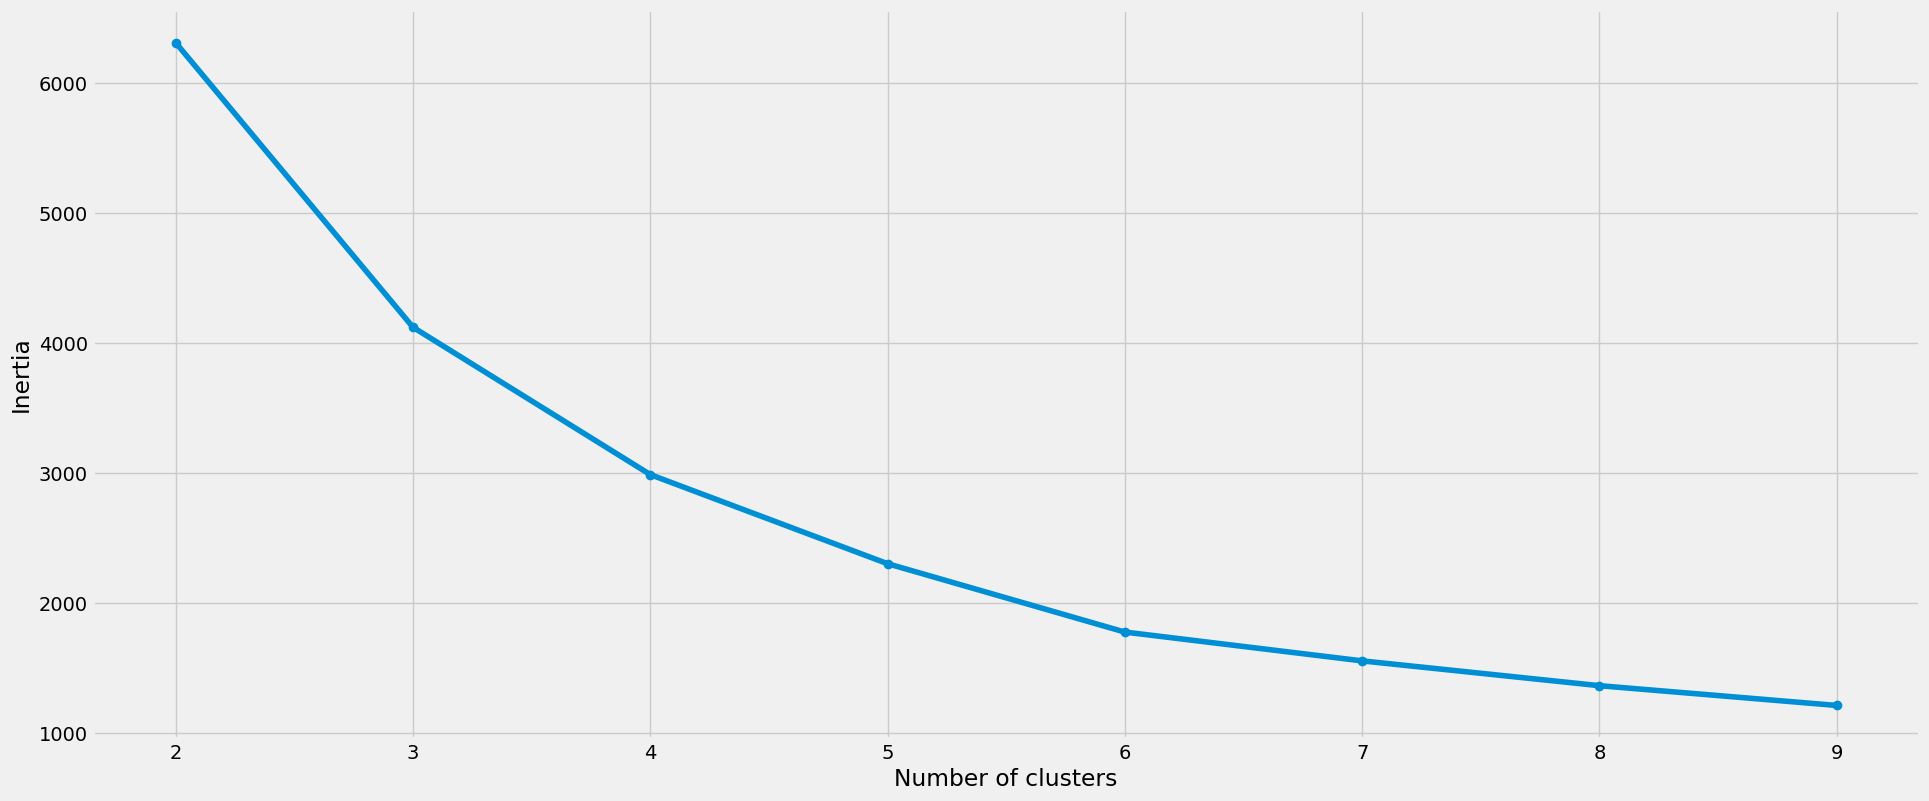

In [48]:
from sklearn.cluster import KMeans
SSE = []
for cluster in range(2,10):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(df_clean_scaled)
    SSE.append(kmeans.inertia_)

_ = pd.DataFrame({'Cluster':range(2,10, 1), 'SSE':SSE})
plt.figure(figsize=(21,9))
plt.plot(_['Cluster'], _['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

We will continue with k=3.

##Clustering

In [49]:
K = 3
kmeans = KMeans(n_clusters = K, init='k-means++')
kmeans.fit(df_clean_scaled)
pred = kmeans.predict(df_clean_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Creating a dataframe for both our Ks

In [50]:
df = pd.DataFrame(df_clean_scaled)
df['cluster'] = pred
df['CustomerNo'] = grouped_df['CustomerNo']

##Conclusion

Combining the datasets

In [51]:
df_enh_1 = pd.merge(df, grouped_df, on='CustomerNo')

In [52]:
df_enh = pd.merge(df_enh_1, df_rfm, on='CustomerNo')

In [53]:
df_enh.head()

,TotalTransactions_x,TotalQuantity_x,TotalRevenue_x,cluster,CustomerNo,TotalTransactions_y,TotalQuantity_y,TotalRevenue_y,Recency,Monetary,Frequency
0,-0.468107,-0.296760,-0.282709,0,12004,1,104,1509.60,241,1509.60,1
1,-0.468107,-0.329796,-0.324451,0,12006,1,2,24.76,232,24.76,1
2,-0.468107,-0.194091,-0.165201,0,12008,1,421,5689.57,290,5689.57,1
3,-0.468107,-0.329472,-0.323180,0,12013,1,3,69.96,373,69.96,1
4,-0.468107,-0.325909,-0.320943,0,12024,1,14,149.52,190,149.52,1


In [54]:
cluster_summary = (
    df_enh.groupby('cluster').agg(
        nu_obs = ('CustomerNo', 'count'),
        avg_total_quantity = ('TotalQuantity_y', 'mean'),
        avg_total_revenue = ('TotalRevenue_y', 'mean'),
        avg_recency = ('Recency', 'mean'),
        avg_frequency = ('Frequency', 'mean'),
        avg_monetary = ('Monetary', 'mean')
    ).reset_index().sort_values('avg_total_revenue')
)

In [55]:
cluster_summary

,cluster,nu_obs,avg_total_quantity,avg_total_revenue,avg_recency,avg_frequency,avg_monetary
0,0,4023,577.282376,6567.613676,115.634601,3.399950,6567.613676
1,1,284,4947.003521,56047.303063,32.510563,21.070423,56047.303063
2,2,17,40252.470588,451348.068235,19.764706,73.882353,451348.068235


* Cluster 2: very frequent, highest spenders, not that much recency, buying in bulk and generate the most revenue.
* Cluster 1: recent but not that frequent buyers, high spenders, buying a lot of items and generating a lot of revenue.
* Cluster 0: low frequency but high recency  (new customers) but low on spending.